# THE PROBLEM STATEMENT

The objective of this case study is to predict the employee salary based on the number of years of experience.


# IMPORT LIBRARIES AND DATASETS

In [ ]:
# install seaborn library
# !pip install seaborn
# !pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


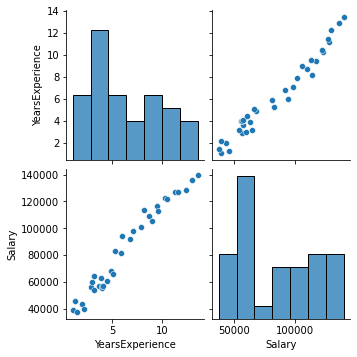

In [8]:
# plot pairplot

sns.pairplot(salary_df)

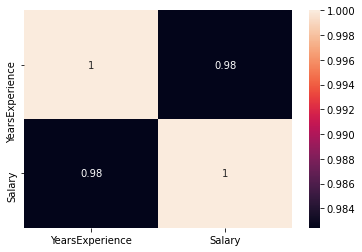

In [9]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# CREATE TRAINING AND TESTING DATASET

In [ ]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [11]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [12]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [13]:
X.shape

(35, 1)

In [14]:
y.shape

(35, 1)

In [15]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [16]:
# Only take the numerical variables and scale them
X 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [17]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE -  SIMILAR TO WHAT WE HAVE)

In [18]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [19]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9645654317630646

In [20]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8804.039]]
Linear Model Coefficient (b):  [29180.527]


# EVALUATE TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [21]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [22]:
y_predict

array([[105775.67 ],
       [ 91689.2  ],
       [137470.2  ],
       [ 48549.414],
       [ 46788.605],
       [ 65277.086],
       [148035.06 ]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

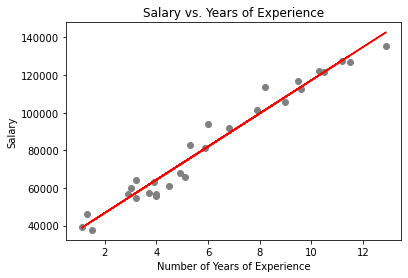

In [23]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

# TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [ ]:
import sagemaker
import boto3
from sagemaker import Session

# create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
# Define the S3 bucket and prefix that we want to use in this session
# bucket = 'sagemaker-practica' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Get the execution role for the notebook instance.
role = sagemaker.get_execution_role()
print(role)

In [35]:
X_train.shape

(28, 1)

In [36]:
y_train = y_train[:,0]

In [37]:
y_train.shape

(28,)

In [ ]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


In [39]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-2-542063182511/linear_learner/train/linear-train-data


In [40]:
X_test.shape

(7, 1)

In [41]:
y_test.shape

(7, 1)

In [42]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [ ]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0)

In [44]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-us-east-2-542063182511/linear_learner/test/linear-test-data


In [45]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-2-542063182511/linear_learner/output


In [ ]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Obtain a reference to the linearLearner container image

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances= True, #these three argument will cut cost - in my trial it was 81%
                                       train_max_run= 400,
                                       train_max_wait= 700)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL

In [ ]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [ ]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [ ]:
result # results are in Json format

In [ ]:

predictions = np.array([r['score'] for r in result['predictions']])

In [ ]:
predictions

In [ ]:
predictions.shape

Text(0.5, 1.0, 'Salary vs. Years of Experience')

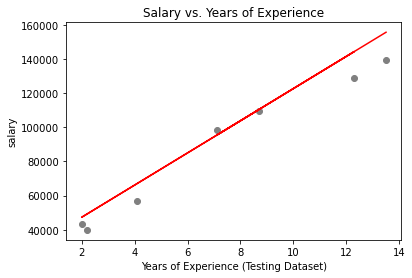

In [58]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [59]:
# Delete the end-point

linear_regressor.delete_endpoint()